Many techinques have been designed to handle the classification task on an unbalanced dataset. Let us understand how the problem arises and what different techniques are actually doing. 

I create a simple dataset with two Gaussian clusters. The first cluster is centered at $(1,1)$ and the second cluster is centered at $(-1,1)$. I use $\rho$ to speify the unbalancedness, i.e, $\rho$ is the percentage of the data points from the first cluster. As $\rho$ approaches $0$ or $1$, the data becomes more unbalanced. When $\rho=0.5$, the data set is perfectly balanced. 

I also plot the learned linear boundary (from logistic regression) for different $\rho$.

coefficient [-0.89215724 -0.99202751]
intercept [-0.28722055]


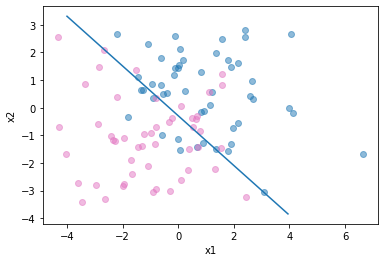

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

def plot_seperation(N,rho, weight=1):
    num_points = [int(N*rho),int(N*(1-rho))] 
    totol_num = np.sum(num_points)

    cluster_centers = np.array([[1,1],[-1,-1]])

    X_plus = cluster_centers[0,:] + np.random.normal(scale=1.5, size=(num_points[0],2))
    X_minus = cluster_centers[1,:] + np.random.normal(scale=1.5, size=(num_points[1],2))

    X = np.concatenate((X_plus,X_minus),axis=0)
    y = np.array([0 for i in range(totol_num)])
    y[num_points[0]:]=np.array([1 for i in range(num_points[1])])

    lr = LogisticRegression(penalty='none',class_weight={0:1,1:weight})

    lr.fit(X,y)

    coef = lr.coef_[0]
    c = lr.intercept_

    print('coefficient', coef)
    print('intercept', c)
    sep_line = lambda x: -coef[0]/coef[1]*x-c/coef[1]

    plt.scatter(X_plus[:,0], X_plus[:,1], c='#1f77b4', alpha=0.5)
    plt.scatter(X_minus[:,0], X_minus[:,1], c='#e377c2', alpha=0.5)

    xs = np.arange(-4.0,4.0,0.05)
    ys = [sep_line(x) for x in xs]
    plt.plot(xs,ys)
    plt.xlabel('x1')
    plt.ylabel('x2')
    fpr, tpr, thresholds = roc_curve(y, lr.predict_proba(X)[:,1])
    return [fpr,tpr,thresholds]

[fpr,tpr,thresholds] = plot_seperation(100,0.5)

In the above simulated case, I create a balanced dataset, and it is seen that the learned boundary is at $x_1+x_2=0$. Now suppose I set $\rho=0.8$, then the learned boundary will be further away from the first cluster. This is because the logistic regression is based on the maximum likelihood estimation, which is sensitive to the underlying data distribution. 

Recall when we make prediction, we classify points 

- positive: if it is at one side of the boundary;
- negative: if it is at the other side of the boundary.

Translating this rule in probability, we classify points

- positive: if the predicted probability is $\gt 0.5$; 
- negative: if the predicted probability is $\lt 0.5$.


In the unbalanced case, since the boundary is shifted towards the second cluster, the above decision rule leads to
- less mistakes for classifying points from the first cluster,
- more mistakes for classifying points from the second cluster.

To reolve the above issue, modifying the probabilty threshold (usual one is $0.5$) is used. This is how the ROC (receiver operator curve) comes into place. ROC curve measures the false positive rate (FPR) vs the true positive rate (FPR) with varying probability threshold. 


In real problems, false positive (FP) and false negative (FN) has different cost. For practitioners, we would like to

$\text{min} \quad FPR*cost(FP)+(1-TPR)*cost(FN)$,

the probability thredshold is picked such that the above quantity is minimized. 

coefficient [-0.32822185 -0.84041102]
intercept [-1.43826903]


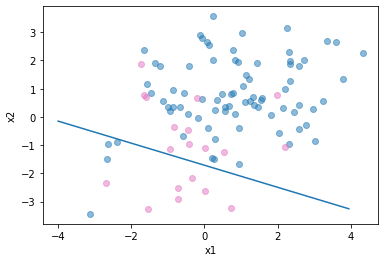

In [21]:
[fpr,tpr,thresholds] = plot_seperation(100,0.8)

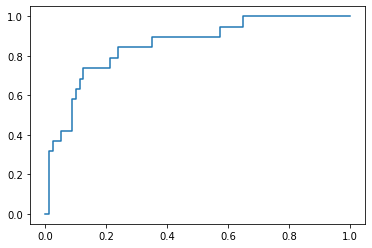

In [22]:
plt.plot(fpr,tpr)

On the other hand, if we do not care about the cost and would like to simply use the rule that 

- predict positive if the predicted probability is $\gt 0.5$;
- predict negative if the predicted probability is $\lt 0.5$,

then we can simply adjust the weight of the positive and negative samples. 

In the above unbalanced case, when calling the logistic regression, we assign class 1 to be of weight 4 (ratio between the positive labels and the negative labels). Assigning weight to positive class is equivalent to __artifically__ injecting repeated positive samples to the training dataset. Then the learned boundary shall be close to the balanced case. 

coefficient [-0.56389788 -1.29744057]
intercept [-0.08105126]


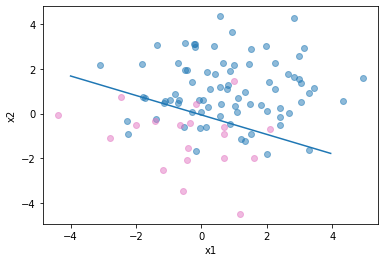

In [25]:
rho = 0.8
w = rho/(1-rho)
[fpr,tpr,thresholds] = plot_seperation(100,rho,weight=w)